In [6]:
#IMPORTAR PACKAGES y LIBRARYS

#Librerías útiles
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from time import strptime
from scipy.signal import periodogram
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score
from itertools import combinations
from tqdm.notebook import tqdm

#Modelos de Pruebas Estadísticas
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.stattools import kpss
from statsmodels.tsa.vector_ar.vecm import coint_johansen
from statsmodels.tsa.stattools import grangercausalitytests
from statsmodels.tools.eval_measures import mse,rmse,rmspe,bias,meanabs

#Modelos predictivos estadísticos
from statsmodels.tsa.holtwinters import ExponentialSmoothing

#Configuraciones
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
#PREPARACIÓN_DATA

df= pd.read_excel("C:/Users/Usuario/OneDrive - prediqtdata.com/Desktop/Renato/Python/script atenea/consolidado_moderno.xlsx"
,sheet_name="Salsas")
df.replace(dic_mes, inplace=True)
df['Quarter'] = df['MES'].apply(lambda x: 'Quarter1' if x in [1, 2, 3] else 'Quarter2' if x in [4, 5, 6] else 'Quarter3' if x in [7, 8, 9] else 'Quarter4')
df['Month_in_Quarter'] = df['MES'].apply(lambda x: 1 if x % 3 == 1 else 2 if x % 3 == 2 else 3)
df["PERIODO"]= df["AÑO"].astype(str)+"-"+df["MES"].astype(str)

df['PERIODO'] = pd.to_datetime(df['PERIODO'])    
#df['PERIODO'] = df['PERIODO'].dt.to_period('M')
df = df.set_index('PERIODO')

cols=['PERIODO','AÑO','MES','Quarter','Month_in_Quarter','OFICINA DE VENTAS'
      ,'VENTA SELL IN', 'VENTA SELL OUT TOTAL'
      , 'SHARE VOLUMEN ALICORP', 'SHARE VOLUMEN MERCADO'
      ,'SHARE % ALICORP','SHARE % MERCADO']

cols_data =['VENTA SELL IN'
      #, 'VENTA SELL OUT TOTAL'
      #, 'SHARE VOLUMEN ALICORP'
      #,'SHARE VOLUMEN MERCADO'
      #,'SHARE % ALICORP'
      #,'SHARE % MERCADO'
      ]


df_ini=df[cols_data]
df_ini



,VENTA SELL IN
PERIODO,
2019-01-01,680.000000
2019-02-01,434.000000
2019-03-01,640.000000
2019-04-01,562.000000
2019-05-01,651.000000
2019-06-01,603.000000
2019-07-01,577.000000
2019-08-01,467.000000
2019-09-01,616.000000


  0%|          | 0/36 [00:00<?, ?it/s]

C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
C:\Users\Usuario\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8

            VENTA SELL IN FORECAST  VENTA SELL IN      std_50    ci_lower  \
2020-08-01              508.124948     747.000000         NaN         NaN   
2020-09-01              791.398053     765.000000         NaN         NaN   
2020-10-01              679.339461     627.000000         NaN         NaN   
2020-11-01              621.359924     996.000000         NaN         NaN   
2020-12-01              806.247145     866.000000         NaN         NaN   
2021-01-01              792.981474    1142.249670         NaN         NaN   
2021-02-01              735.877814     238.390824         NaN         NaN   
2021-03-01              861.292143     610.313136         NaN         NaN   
2021-04-01              736.440790     780.378240         NaN         NaN   
2021-05-01              766.843031     659.133768         NaN         NaN   
2021-06-01              825.699362     859.009176         NaN         NaN   
2021-07-01              892.298684     597.263856         NaN         NaN   

Text(0.5, 1.0, 'Holt Winters Exponential Smoothing, MSE: 21,196.95')

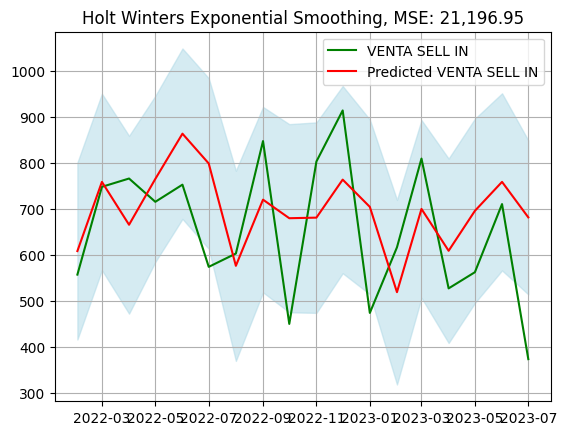

MAPE: 0.219


In [9]:
#MODELO HOLTS WINTER
df_tes = df_ini.copy()

df_pred = pd.DataFrame()
nobs = 36


# predict last nobs values
for i in tqdm(range(nobs)):
    training_data = df_tes['VENTA SELL IN'][:(-nobs+i)]
    
    model = ExponentialSmoothing(training_data, initialization_method="estimated",trend='add',
                                 seasonal='add',seasonal_periods=6)
    model_fit = model.fit()
    yhat = model_fit.predict().to_frame()
    df_pred=pd.concat([df_pred,yhat])
   

df_pred.columns = ['VENTA SELL IN FORECAST']
df_pred = pd.merge(df_pred, df_tes, how = 'left', left_index = True, right_index = True)

# create confidence interval
df_pred['std_50'] = df_pred['VENTA SELL IN FORECAST'].rolling(nobs//2).std()
df_pred['ci_lower'] = df_pred['VENTA SELL IN FORECAST']-2*df_pred['std_50']
df_pred['ci_upper'] = df_pred['VENTA SELL IN FORECAST']+2*df_pred['std_50']
    
pd.plotting.register_matplotlib_converters()
print(df_pred)
df_pred = df_pred[-nobs//2:]
print(df_pred)
plt.plot(df_pred['VENTA SELL IN'], color = 'green')
plt.plot(df_pred['VENTA SELL IN FORECAST'], color = 'red')
plt.legend(['VENTA SELL IN', 'Predicted VENTA SELL IN'])
plt.fill_between(df_pred.index,
                 df_pred['ci_lower'],
                 df_pred['ci_upper'], color='lightblue', alpha=0.5)
plt.title('Holt Winters Exponential Smoothing, MSE: {:,}'.format(round(
    mean_squared_error(df_pred['VENTA SELL IN'], df_pred['VENTA SELL IN FORECAST']),2)))
plt.grid()
plt.show()

MAPE= mean_absolute_percentage_error(df_pred['VENTA SELL IN'], df_pred['VENTA SELL IN FORECAST'])
print("MAPE:", round(MAPE,3))
del df_tes